In [18]:
from numpy import *
from numpy.linalg import norm
import matplotlib.pyplot as plt

# Interference b/w two oblique-incident Gaussian beams
# SI Units 

N = 300 # meshgrid density
λ = 405e-9                        
k = (2*pi/λ)
w0 = 5e-6
zR = pi*w0**2/λ        # Rayleigh length
E0 = 1.8*10**4

# x, z position of source, and angle in radians
source1 = array([-0.229,0, 1.3]) #0.229
source2 = array([0.229, 0,1.3])
# source1 = array([0,0,1.3])


In [19]:
# assume source is on the x-z plane and the incident plane is x-y
def gaussian_beam(source, plane, θ):
    center = array([source[0]+source[2]*tan(θ),0,0]) # beam center hitting x-y plane is on the x axis
    r = norm(cross((center-source),(source-plane)))/norm(center-source)
    z = abs(dot((source-center),(source-plane)))/norm(source-center)
#     print("r",r)
#     print("z",z)
    
    w = w0*sqrt(1+(z/zR)**2) 
    R = z+zR**2/z
    gouy_phase = arctan(z/zR)
    phase_factor = (k*z + k*r**2/(2*R) - gouy_phase)
    return E0*(w0/w)*exp(-r**2/w**2)*exp(-1j*phase_factor)
# gaussian_beam([0,0,1],[0,0,0],0.01*(pi/180))

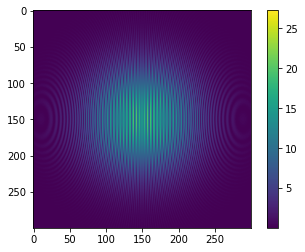

In [20]:
linRange = 0.05

x = linspace(-linRange, linRange, N)
y = linspace(-linRange, linRange, N)
intensity = zeros((N, N))

for i in range(N):
    for j in range(N):
        plane = array([x[j],y[i],0])
        E1 = gaussian_beam(source1,plane,10*(pi/180))
        E2 = gaussian_beam(source2,plane,-10*(pi/180))
        intensity[i,j] = abs(E1+E2)**2

fig = plt.figure()
plt.imshow(intensity)
# plt.pcolor(x,y,intensity)
plt.colorbar()
plt.show()